# Introduction



This notebook is a template for training a PPO model in fake environment. Fake environment is 

---
**NOTE**

To use this notebook, please first follow `UseGuide.md` to install the neccessary packages.

---

In [154]:
%%capture output 
# captures ALL output in cell to disable tensorflow warnings

import numpy as np
from stable_baselines import PPO1

In [155]:
import sys
sys.path.insert(0,'../backend')

# load our webotsgym
from fakegym.fakeenv import WbtGymFake
from fakegym.state import FakeState

In [156]:
world_size = 10
num_obstacles = 16

In [157]:
class MyEnv(WbtGymFake):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obstacles_each=16, step_range=(1, 1), obs=FakeState, obs_len=1):


                  super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, obs, obs_len=obs_len)

    def calc_reward(self):
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            distance = self.get_target_distance() + epsilon
            cost_distance = (distance**0.4) / (distance)
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        """Check done"""
        if self.time_steps == 1000:
            return True
        if self.total_reward < -1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


# env = MyEnv(N=10, num_of_sensors=4, obs_len=1, obstacles_each=4)
# check_env(env)

In [158]:
# normal
# env = WbtGymFake(N=world_size, obstacles_each=num_obstacles)
# env.render()

<Figure size 720x720 with 0 Axes>

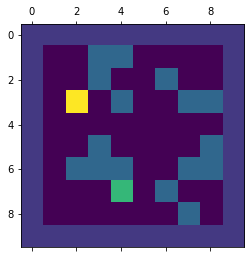

In [159]:
# custom reward class
env = MyEnv(N=world_size, obstacles_each=num_obstacles)
env.render()

In [160]:
%%capture output 
# captures ALL output in cell to disable tensorflow warnings

model_name = "PPO_fakeenv"
model = PPO1("MlpPolicy", env)

In [161]:
time_steps = 100
model.learn(total_timesteps=time_steps)
model.save("model/grid/{}".format(model_name))